## Evaluation
훈련된 모델을 불러와 사용하는 법을 배워 봅니다.

In [1]:
from imutils import paths
import config

totalTest = len(list(paths.list_images(config.TEST_PATH)))

In [2]:
from numpy.random import seed
seed(42)

from keras.models import model_from_json 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

Using TensorFlow backend.


In [3]:
# 모델의 구조 불러오기
json_file = open("model.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# 모델의 가중치 불러오기
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


W0202 23:29:58.948477  5456 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Loaded model from disk


In [4]:
# Evaluation을 위한 데이터를 준비합니다.
eval_datagen = ImageDataGenerator(rescale=1./255)
eval_generator = eval_datagen.flow_from_directory(
        config.TEST_PATH,
        target_size=(64, 64),
        batch_size=64,
        class_mode='categorical',
        color_mode="rgb",
        shuffle=False)

Found 5512 images belonging to 2 classes.


In [5]:
# 불러온 모델을 이용하여 전체 test data에 대한 prediction을 진행합니다.
pred = loaded_model.predict_generator(eval_generator,
	steps=(totalTest // 64) + 1)
print("Predictions finished")

# Prediction은 각 클래스에 대한 확률 [Parasitized 일 확률, Uninfected 일 확률] 로 나타나게 됩니다.
# 따라서 큰 값을 갖는 인덱스를 가져 옵니다.
predIdxs = np.argmax(pred, axis=1)
 
print(classification_report(eval_generator.classes, predIdxs,
	target_names=eval_generator.class_indices.keys()))

W0202 23:30:00.749480  5456 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Predictions finished
              precision    recall  f1-score   support

 Parasitized       0.97      0.91      0.94      2726
  Uninfected       0.92      0.97      0.94      2786

    accuracy                           0.94      5512
   macro avg       0.94      0.94      0.94      5512
weighted avg       0.94      0.94      0.94      5512



In [6]:
key_to_class = dict((v, k) for k, v in eval_generator.class_indices.items())

fig = plt.figure(figsize=(50., 50.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(20, 5),  # creates 2x2 grid of axes
                 axes_pad=0.5,  # pad between axes in inch.
                 )

import random
indexes = random.sample(range(0, totalTest - 1), 100)

import matplotlib.image as mpimg
for index, img_index in enumerate(indexes):
    image_path = config.TEST_PATH + "/" + eval_generator.filenames[img_index]
    img = mpimg.imread(image_path)

    grid[index].set_title("GT - " + key_to_class[eval_generator.classes[img_index]][0] + " : " + key_to_class[predIdxs[img_index]][0])
    grid[index].imshow(img)
    
plt.show()


### P : Parasitized / U : Uninfected

### Exercise
Pre-trained 모델을 불러와서 테스트

Loaded model from disk
Found 5512 images belonging to 2 classes.
Predictions finished


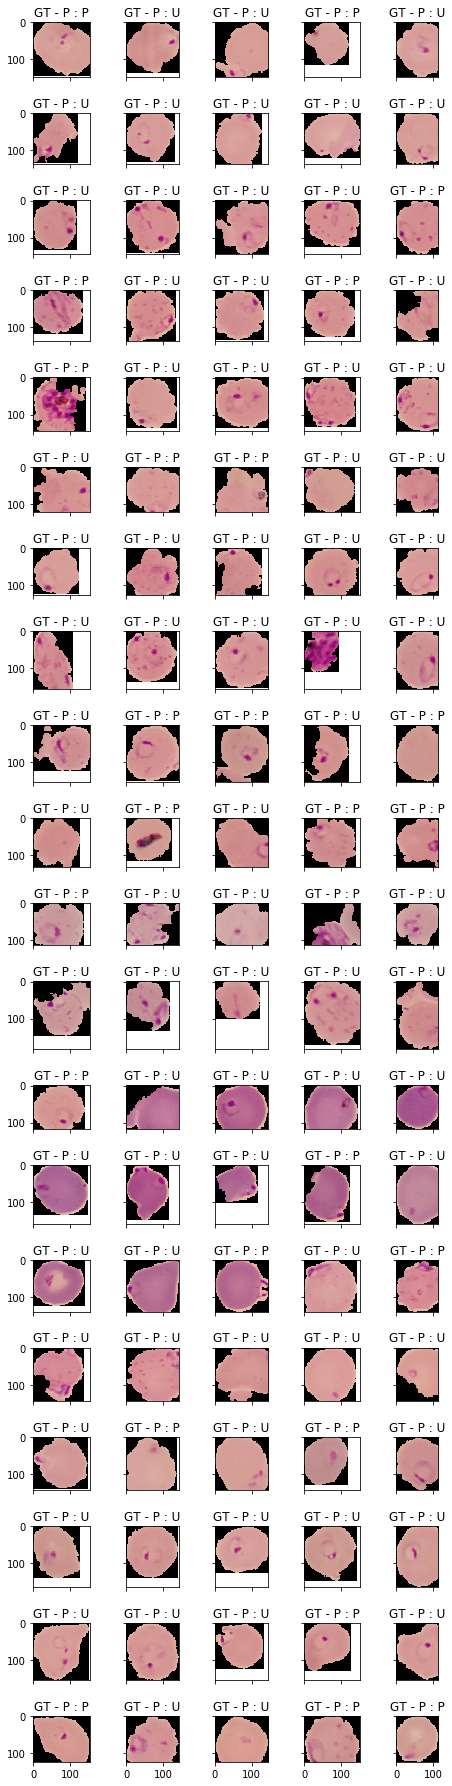

In [3]:

# 모델의 구조 불러오기
json_file = open("pretrained/model.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# 모델의 가중치 불러오기
loaded_model.load_weights("pretrained/model.h5")
print("Loaded model from disk")

# Generator 초기화
eval_generator.reset()    
